# Choosing the location for the well

## Project Description
The project was carried out in the extraction company "MainRussianStateOil" with the aim of determining the most profitable region for drilling a new oil well. Samples of oil were provided in each of the three regions, with measured values of quality and reserves volume for 10,000 deposits. A machine learning model was built using the Bootstrap technique to analyze the potential profit and risks.

Steps taken to select a drilling location:

1. In the preferred region, all deposits were analyzed, and the feature values related to oil quality and reserves volume were determined for each deposit.

2. Model construction: Based on the available data, a machine learning model was built to predict the oil reserves volume based on the given features. Various machine learning algorithms such as linear regression, random forest, or gradient boosting may have been used.

3. Evaluation and selection of deposits: After the model was built, deposits with the highest estimated reserves volume values were selected. The number of selected deposits depended on the company's budget and the cost of developing a single well.

4. Profit calculation: The total profit was determined as the sum of profits from the selected deposits. Profit was calculated based on the predicted oil reserves volume and the current oil price.

5. The Bootstrap technique was used to assess the potential profit and risks. It allows for random sampling from the available data to estimate the statistical significance and confidence intervals for the expected profit. This helped in making a decision on the selection of the most promising region for drilling a well, considering the expected profit and potential risks.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

## Загрузка и подготовка данных

In [2]:
gd_0 = pd.read_csv(r'datasets/07_geo_data_0.csv')
gd_1 = pd.read_csv(r'datasets/07_geo_data_1.csv')
gd_2 = pd.read_csv(r'datasets/07_geo_data_2.csv')

In [3]:
gd_0.head(), gd_1.head(), gd_2.head()

(      id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647
 3  iJLyR -0.032172  0.139033  2.978566  168.620776
 4  Xdl7t  1.988431  0.155413  4.751769  154.036647,
       id         f0         f1        f2     product
 0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
 1  62mP7  14.272088  -3.475083  0.999183   26.953261
 2  vyE1P   6.263187  -5.948386  5.001160  134.766305
 3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
 4  AHL4O  12.702195  -8.147433  5.004363  134.766305,
       id        f0        f1        f2     product
 0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
 1  WJtFt  0.262778  0.269839 -2.530187   56.069697
 2  ovLUW  0.194587  0.289035 -5.586433   62.871910
 3  q6cA6  2.236060 -0.553760  0.930038  114.572842
 4  WPMUX -0.515993  1.716266  5.899011  149.600746)

In [4]:
gd_0 = gd_0.drop(['id'], axis=1)
gd_1 = gd_1.drop(['id'], axis=1)
gd_2 = gd_2.drop(['id'], axis=1)

We discard the data by the identifier, since it has no effect on the target attribute

All three datasets have the same number of columns with the same names. It is impossible to assess the correctness of the data at first glance, since it is not known which signs are encrypted under f0-f2.

Data description:
- id — unique well identifier;
- f0, f1, f2 — three signs of dots (it doesn't matter what they mean, but the signs themselves are significant);
- product — the volume of reserves in the well (thousand barrels).

In [7]:
# Description function
def descripe_colums(gd_0):

    values = pd.DataFrame()

    for col in gd_0.columns:
        values[col] = [gd_0[col].unique(), gd_0[col].dtypes, gd_0[col].nunique(), gd_0[col].isnull().sum().sum(), gd_0.duplicated().sum()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Values', 1: 'Data Type', 2: 'Unique Values', 3: 'Omissions', 4: 'Duplicates'}, axis=1)
descripe_colums(gd_0)

,Values,Data Type,Unique Values,Omissions,Duplicates
f0,"[0.7057449842080644, 1.3347112926051892, 1.022...",float64,100000,0,0
f1,"[-0.4978225001976334, -0.3401642528583136, 0.1...",float64,100000,0,0
f2,"[1.22116994843607, 4.3650803324282, 1.41992623...",float64,100000,0,0
product,"[105.28006184349584, 73.03775026515737, 85.265...",float64,100000,0,0


In [8]:
# Description function
def descripe_colums(gd_0):

    values = pd.DataFrame()

    for col in gd_0.columns:
        values[col] = [gd_1[col].unique(), gd_1[col].dtypes, gd_1[col].nunique(), gd_1[col].isnull().sum().sum(), gd_1.duplicated().sum()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Values', 1: 'Data Type', 2: 'Unique Values', 3: 'Omissions', 4: 'Duplicates'}, axis=1)
descripe_colums(gd_1)

,Values,Data Type,Unique Values,Omissions,Duplicates
f0,"[-15.00134818249185, 14.272087811011149, 6.263...",float64,100000,0,0
f1,"[-8.275999947188001, -3.47508321506002, -5.948...",float64,100000,0,0
f2,"[-0.0058760136933206, 0.9991827365665829, 5.00...",float64,100000,0,0
product,"[3.179102583207246, 26.95326103153969, 134.766...",float64,12,0,0


In [9]:
# Description function
def descripe_colums(gd_2):

    values = pd.DataFrame()

    for col in gd_0.columns:
        values[col] = [gd_2[col].unique(), gd_2[col].dtypes, gd_2[col].nunique(), gd_2[col].isnull().sum().sum(), gd_2.duplicated().sum()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Values', 1: 'Data Type', 2: 'Unique Values', 3: 'Omissions', 4: 'Duplicates'}, axis=1)
descripe_colums(gd_2)

,Values,Data Type,Unique Values,Omissions,Duplicates
f0,"[-1.1469870984179529, 0.2627779016539684, 0.19...",float64,100000,0,0
f1,"[0.9633279217162892, 0.2698389572803021, 0.289...",float64,100000,0,0
f2,"[-0.8289649221710994, -2.530186515492004, -5.5...",float64,100000,0,0
product,"[27.75867323073004, 56.06969663239464, 62.8719...",float64,100000,0,0


All three datasets do not contain omissions, duplicates, all signs and the target value of product are represented by the float data type. It is not clear why gd_1 has only 12 unique values for the product. Perhaps they are obtained by means of an algorithm, since they are synthetic data.

In [10]:
display(gd_0.describe())
display(gd_1.describe())
display(gd_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


The release of the product in region 0 is similar to the release in the Region 2 - 25%, 50%, 75% and the maximum median values differ from each other insignificantly. The distribution of data on the basis of f2 is also interesting - the values of Regions 0 and 2 are close to each other, while the target indicator has a significant gap. Data scaling is not required.

## Model training and validation

### Divide the data into training and validation samples in a ratio of 75:25.

In [11]:
#let's write a function to divide the data into samples and scale
def split_gd(gd, target):
    features = gd.drop([target] , axis=1)
    target = gd[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [12]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_gd(gd_0, 'product')
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_gd(gd_1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_gd(gd_2, 'product')

In [13]:
# let's check the function on one of the regions
print(features_train_0.shape)
print(features_valid_0.shape)
print(target_train_0.shape)
print(target_valid_0.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [14]:
features_train_0.describe()

,f0,f1,f2
count,75000.000000,75000.000000,75000.000000
mean,0.497441,0.250064,2.505917
std,0.871824,0.504203,3.249684
min,-1.408605,-0.848218,-10.138341
25%,-0.075827,-0.199952,0.296284
50%,0.499079,0.249690,2.519854
75%,1.070328,0.700239,4.725356
max,2.362331,1.343769,16.003790


### Let's train the model and make predictions on the validation sample.

In [15]:
def model_prediction(gd, features_train, features_valid, target_train, target_valid):
    model = LinearRegression() 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse**0.5
    r2 = model.score(features_train, target_train)
    mean_product = predicted_valid.mean()
    

    return rmse, mean_product, predicted_valid

### Let's save the predictions and correct answers on the validation sample.

In [16]:
rmse_0, mean_product_0, predicted_valid_0 = model_prediction(gd_0, features_train_0, features_valid_0, target_train_0, target_valid_0)
predicted_valid_0 = pd.Series(predicted_valid_0)

In [17]:
rmse_1, mean_product_1, predicted_valid_1 = model_prediction(gd_1, features_train_1, features_valid_1, target_train_1, target_valid_1)
predicted_valid_1 = pd.Series(predicted_valid_1)

In [18]:
rmse_2, mean_product_2, predicted_valid_2 = model_prediction(gd_2, features_train_2, features_valid_2, target_train_2, target_valid_2)
predicted_valid_2 = pd.Series(predicted_valid_2)

### Let's print on the screen the average stock of the predicted raw materials and the RMSE of the model

In [19]:
print('Region 0. Average product stock:', mean_product_0)
print('Region 0. RMSE =', rmse_0)
print('Region 1. Average product stock:', mean_product_1)
print('Region 1. RMSE =', rmse_1)
print('Region 1. Average product stock:', mean_product_2)
print('Region 1. RMSE =', rmse_2)

Region 0. Average product stock: 92.59256778438035
Region 0. RMSE = 37.5794217150813
Region 1. Average product stock: 68.72854689544602
Region 1. RMSE = 0.8930992867756168
Region 1. Average product stock: 94.96504596800489
Region 1. RMSE = 40.02970873393434


In [20]:
#We conduct a reconciliation with the validation sample
print('Region 0. Average stock on validation sample', target_valid_0.mean())
print('Region 1. The average stock on the validation sample', target_valid_1.mean())
print('Region 2. The average margin on the validation sample', target_valid_2.mean())

Region 0. Average stock on validation sample 92.07859674082941
Region 1. The average stock on the validation sample 68.72313602437494
Region 2. The average margin on the validation sample 94.88423280885489


Despite the smallest average stock of the product, the best indicator for RMSE Region 1.

### Analysis of results

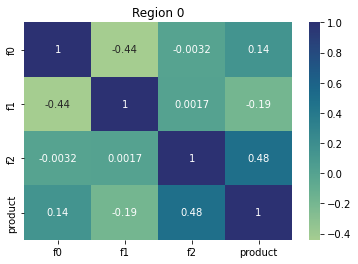

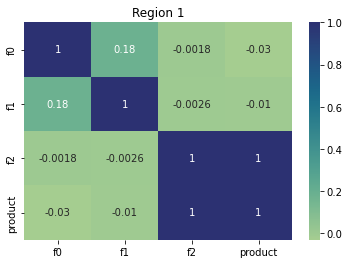

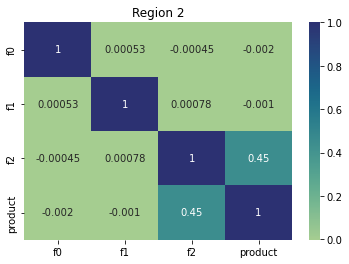

In [21]:
#
gd_all = [gd_0, gd_1, gd_2]
for i in range(len(gd_all)):
    ax = plt.axes()
    sns.heatmap(gd_all[i].corr(), annot = True, cmap="crest")
    ax.set_title('Region ' + str(i))
    plt.show()

All 3 values showed a result close to the valid sample. At the same time, the best RMSE indicator corresponds to Region 1, in Regions 0 and 2, the RMSE indicators are close in values. For Region 1, there is a direct dependence of the product on the attribute f2. This is also due to the lower RMSE value. This is possible if the volume of the product in this region is directly determined by the sign f2. If there was such a connection between the features, then the duplicate feature would have to be removed.

Earlier, we found similar values in Region 0 and Region 2 on the basis of f2. When considering the correlation, we really see that this attribute has the most significant impact on the result (product) and the value of its influence is also at level 1. f0 and f1, on the contrary, show insignificant influence.

## Preparation for profit calculation

### Save all key values for calculations in separate variables

In [23]:
BUDGET = 10*10**9 # Budget for developing 200 wells in the region
ALL_WELLS = 500 # 500 points are explored during the region's exploration
BEST_WELLS = 200 # 200 best wells are selected for development using machine learning
PRICE_ONE_BARREL = 450000 # At current prices, one barrel of resources generates a revenue of 450 rubles. The revenue per unit is 450,000 rubles, as the volume is given in thousands of barrels.
MAX_RISK = 0.025 # Maximum acceptable risk

### Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [24]:
BUDGET_ONE_WELL = BUDGET / BEST_WELLS
print('Budget for the development of one well:', BUDGET_ONE_WELL)

Budget for the development of one well: 50000000.0


In [26]:
MIN_RESOURCE_ONE_WELL = BUDGET_ONE_WELL / PRICE_ONE_BARREL
print('Minimum resource volume per well:', MIN_RESOURCE_ONE_WELL)

Minimum resource volume per well: 111.11111111111111


In [27]:
print('Region 0. Average product stock:', mean_product_0)
print('Region 1. Average product stock:', mean_product_1)
print('Region 2. Average product stock:', mean_product_2)

Region 0. Average product stock: 92.59256778438035
Region 1. Average product stock: 68.72854689544602
Region 2. Average product stock: 94.96504596800489


### Conclusions on the stage of preparation of profit calculation.

The average values for all three regions are below breaking even. This means that it is impossible to select random wells from the best region. It is necessary to train a model that predicts suitable wells for development.

In each region, the average volume of raw materials is less than enough to break even.
There are 25,000 points, from which 200 should be selected as a result. As a result, among these wells there may be wells with sufficient and insufficient supply of raw materials.

There is a "Bootstrap" technique that allows you to assess the risk of losses with a random selection of points. 1000 times randomly selecting points, we consider which% of cases will bring losses.

## Calculation of profit and risks

### The function for calculating the profit for the selected wells and the predictions of the model:
1. We select wells with the maximum values of predictions.
2. Sum up the target value of the volume of raw materials corresponding to these predictions.
3. Calculate the profit for the received volume of raw materials

In [31]:
def income(target_valid, predictions_valid):
    predictions_top_all = predictions_valid.sort_values(ascending=False).head(200) 
    income = predictions_top_all.sum() * PRICE_ONE_BARREL
    return income

In [32]:
print('Profit calculation for selected 200 wells and model predictions:')
print('Region 0:', int(income(target_valid_0, predicted_valid_0) - BUDGET)/1000000, 'million rubles')
print('Region 1:', int(income(target_valid_1, predicted_valid_1) - BUDGET)/1000000, 'million rubles')
print('Region 2:', int(income(target_valid_2, predicted_valid_2) - BUDGET)/1000000, 'million rubles')

Profit calculation for selected 200 wells and model predictions:
Region 0: 3996.048877 million rubles
Region 1: 2485.712051 million rubles
Region 2: 3321.754396 million rubles


The volume of the predicted income is enormous, provided that we select among 25 thousand points, according to the task we need to select only 500 of them.

### Consider the risks and profits for each region:
- Let's use the Bootstrap technique with 1000 samples to find the profit distribution.
- Determine the average profit, the 95% confidence interval and the risk of losses.

In [33]:
def profit(target, predictions, count):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    predictions_top = predictions.sort_values(ascending=False)[:count].index
    selected = target[predictions_top]
    return  selected.sum() 

In [36]:
def bootstrap(target, probabilities, iterations, sample_size):
    state = np.random.RandomState(12345)
    values = []
    for i in range(iterations):
        target_subsample = target.sample(n=sample_size, random_state=state, replace=True)
        probs_subsample = probabilities[target_subsample.index]
        values.append(PRICE_ONE_BARREL * profit(target_subsample, probs_subsample, BEST_WELLS) - BUDGET)

    values = pd.Series(values)
    mean = values.mean()
    risk = (values < 0).mean()
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    return round(mean,2), round(risk, 2), lower, upper

In [37]:
mean_0, risk_0, lower_0, upper_0 = bootstrap(target_valid_0.reset_index(drop=True), predicted_valid_0, 1000, 500)
print('Region 0:')
print('Average product stock', mean_0)
print('95% confidence interval from', lower_0, 'to', upper_0)
print('Risk of loss:', risk_0)

Region 0:
Average product stock 396164984.8
95% confidence interval from -111215545.89049526 to 909766941.5534226
Risk of loss: 0.07


In [38]:
mean_1, risk_1, lower_1, upper_1 = bootstrap(target_valid_1.reset_index(drop=True), predicted_valid_1, 1000, 500)
print('Region 1:')
print('Average product stock', mean_1)
print('95% confidence interval from', lower_1, 'to', upper_1)
print('Risk of loss:', risk_1)

Region 1:
Average product stock 456045105.79
95% confidence interval from 33820509.39898363 to 852289453.866036
Risk of loss: 0.02


In [39]:
mean_2, risk_2, lower_2, upper_2 = bootstrap(target_valid_2.reset_index(drop=True), predicted_valid_2, 1000, 500)
print('Region 2:')
print('Average product stock', mean_2)
print('95% confidence interval from', lower_2, 'to', upper_2)
print('Risk of loss:', risk_2)

Region 2:
Average product stock 404403866.57
95% confidence interval from -163350413.39560106 to 950359574.9237995
Risk of loss: 0.08


### Conclusion

Based on the data provided and the research conducted, as well as taking into account the limitations of 500 explored deposits and the selection of the top 200, as well as taking into account the limitations in risks of no more than 2.5%, preference should be given to Region 1 - despite the smaller amount of the average product reserve for the region as a whole.

At the same time, attention should be paid to the influence of factor 2 on the volume of products and on a total of 12 unique values for the release of the product in the region, it is necessary to double-check the adequacy of the embedded algorithm, which gives a 100 correlation between the factor and the receipt of the product, given that in the other two regions such a strong relationship has not been revealed.